___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://machinelearningmastery.com/wp-content/uploads/2016/03/Compare-Machine-Learning-Algorithms.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Comparación de modelos de regresión</font>

Una vez que aprendimos a crear los modelos de machine learning ¿qué hacemos con ellos?

Comparar varios modelos de machine learning para problemas de regresión es necesario para poder encontrar cuál de todos los modelos es el más eficiente y tiene los resultados más precisos. 

Hay muchos criterios para comparar los modelos. 

Recordando que si la **variable de respuesta es continua** entonces, este es un problema de **regresión** y tenemos que usar modelos de regresión para estimar los valores predichos. 

Como vimos, hay muchos modelos de regresión candidatos. Nuestra tarea es encontrar el que sirva a nuestro propósito.

Vamos a comparar los siguientes modelos:
- Regresión lineal múltiple
- Regresión Ridge
- Árbol de decisión
- Bosques Aleatorios
- SVR
- Redes Neuronales

Vamos a utilizar varias métricas para comparar los modelos.

### Métricas de Performance (Regresión)

**Error Absoluto Medio (Mean Absolute Error - MAE)**

Si $y$ es la variable de respuesta y $\hat{y}$ es la predicción, entonces el MAE es el error entre estos pares ($y$,$\hat{y}$) de variables y se calcula de la forma:

$$MAE = \frac{\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|}{n}$$

*¿Qué hace?*
- Mide el promedio del error absoluto entre los valores reales y las predicciones

*Ventajas*
- Es una métrica independiente de la escala, lo que significa que está en las mismas unidades de las variables originales. 
- Fácil de interpretar
- Es buena opción si no nos importan los valores atípicos

*Desventajas*
- Se les da la misma importancia (peso) a todos los errores
- Es insensible a valores atípicos



**Error Cuadrático Medio (Mean Square Error - MSE)**


$$MSE = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{n}$$

*¿Qué hace?*
El MSE calcula el promedio de los cuadrados del error entre los valores verdaderos y los valores estimados

*Ventajas*
- Función diferenciable
- El efecto de errores más grandes se vuelve más pronunciado que los errores más pequeños

*Desventajas*
- Tiene diferentes unidades que los valores reales


**Diferencia entre el MAE y el MSE**

La gran diferencia es cómo responden a errores más grandes. 

Depende mucho de la decisión del negocio y el costo asociado a los errores. 
     
 **R^2**
 
 $$R^{2}=1-\frac{SS_{res}}{SS_{Tot}}= \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$
 
 *¿Qué hace?*
- Explica la proporción de la varianza de la salida ("Y") que puede ser explicada por los predictores ("X")

*Desventajas*
- Siempre incrementa añadiendo más variables independientes (X), lo cual es una desventaja porque esas variables pueden no ser importantes para el modelo

*Ventajas*
- Es una métrica relativa que se usa para comparar varios modelos que fueron entrenados con los mismos datos

     
     
 

### Los Datos

Tenemos un dataset de personas que tienen un carro y lo quieren vender. Se tienen las siguientes variables:

- Age 
- Gender
- Miles: promedio de millas manejadas por día
- Debt
- Income
- **Sales**

Basados en esas variables, queremos predecir el valor potencial de venta de un carro, por lo que variable a predecir es "Sales". 

In [1]:
#Librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Selección de variables
from sklearn.feature_selection import RFE

#regresión lineal
from sklearn.linear_model import LinearRegression
#Ridge
from sklearn.linear_model import Ridge
#árbol de decisión
from sklearn.tree import DecisionTreeRegressor
#Bosque aleatorio
from sklearn.ensemble import RandomForestRegressor
#Maquina de Vector Soporte (SVR)
from sklearn.svm import SVR
#Redes Neuronales
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD, Adam
#XGboost
import xgboost as xgb

#métricas de performance
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error, r2_score

#Cross validation y train-test split
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, KFold

#Grid Search
from sklearn.model_selection import GridSearchCV

In [2]:
#cargar datos
datos = pd.read_csv('./data/carros.csv')
datos.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


## Exploración de Datos

In [3]:
#Revisamos si hay datos nulos
missing = pd.DataFrame(datos.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
age,0
gender,0
miles,0
debt,0
income,0
sales,0


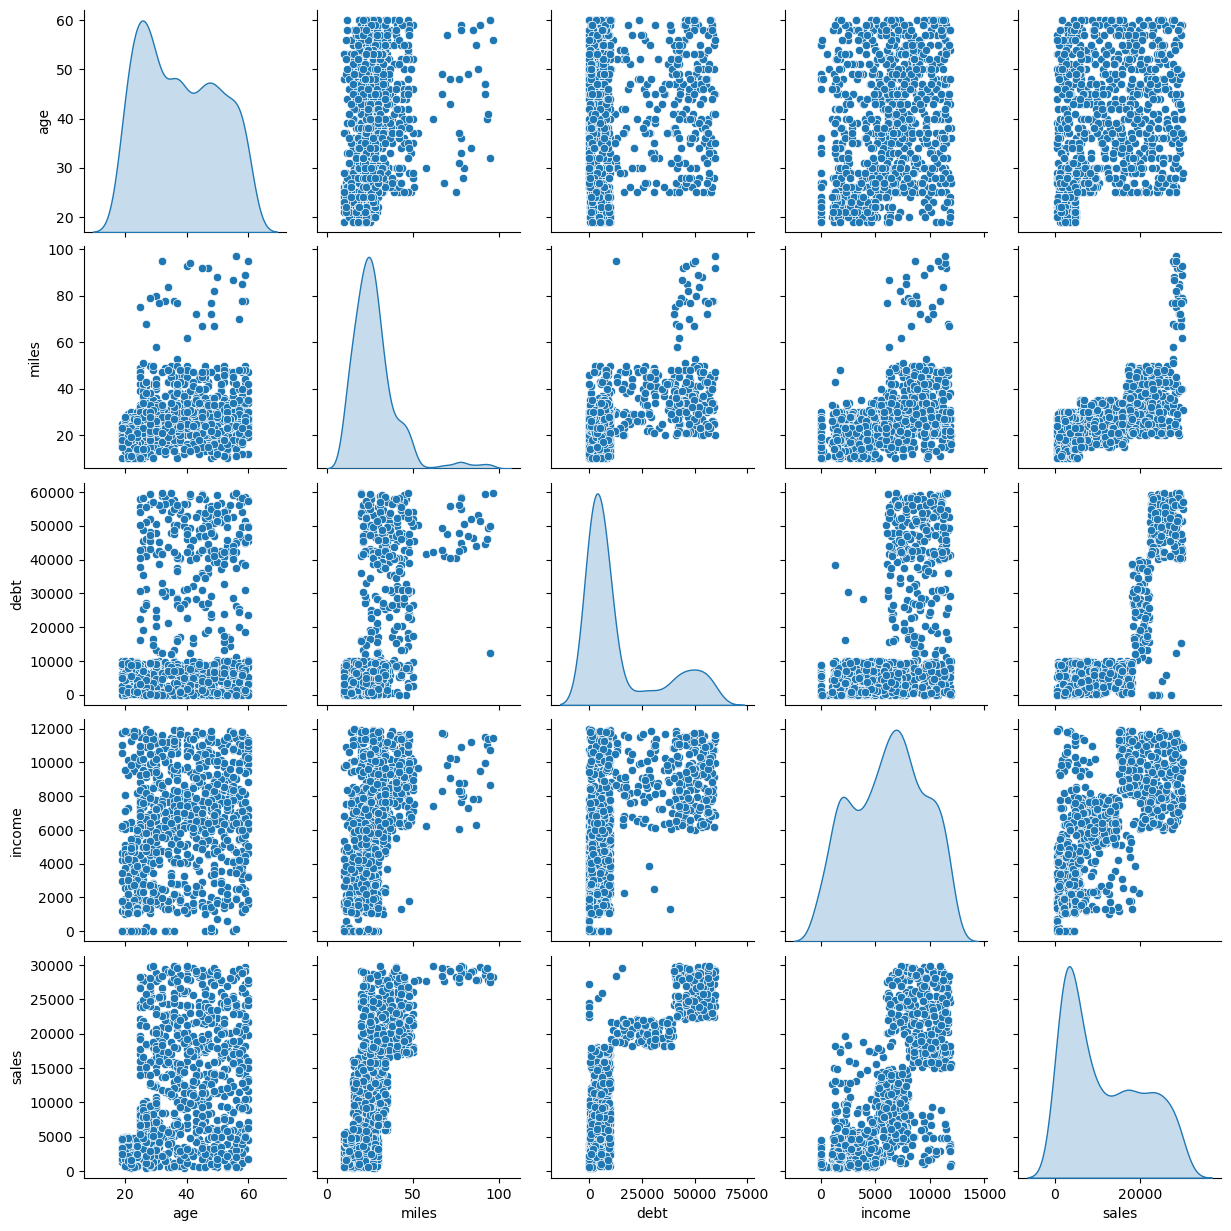

In [4]:
#Creamos gráficos básicos de los datos
sns.pairplot(datos[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [5]:
# Calculo de la asimetria con pandas
skewness = round(datos.skew(),2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"}) 

def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Highly Skewed'
    elif (x['value']<=0 and x['value']>=-0.5) or (x['value'] >=0 and x['value']<=0.5):
        return 'Symmetric distribution'
    else: return 'Moderately skewed'
    
skewness['skewness'] = skewness.apply(f, axis=1)

skewness

,value,skewness
age,0.20,Symmetric distribution
gender,-0.05,Symmetric distribution
miles,2.18,Highly Skewed
debt,1.34,Highly Skewed
income,-0.11,Symmetric distribution
sales,0.49,Symmetric distribution


Los datos no están tan sesgados, por lo que podemos dejarlos de esta manera y no transformar los atípicos. 

In [6]:
#Calculando estadísticas básicas con los datos
datos_stats = datos.describe()
datos_stats = datos_stats.transpose()
datos_stats

,count,mean,std,min,25%,50%,75%,max
age,963.0,37.971963,12.290838,19.0,27.0,37.0,49.0,60.0
gender,963.0,0.512980,0.500091,0.0,0.0,1.0,1.0,1.0
miles,963.0,27.704050,13.378181,10.0,20.0,25.0,32.0,97.0
debt,963.0,14109.004154,18273.702481,0.0,1475.0,6236.0,16686.0,59770.0
income,963.0,6176.047767,3260.670142,0.0,3506.5,6360.0,8649.5,11970.0
sales,963.0,11689.860852,8986.896921,500.0,3554.0,9130.0,19245.0,29926.0


De las estadísticas anteriores podemos observar que algunas variables tienen grandes rangos y desviaciones, lo cual puede crear problemas durante el ajuste del modelo. Por lo tanto sería buena idea escalar los datos. 


### Cross Validation con optimización de hiperparámetros

La idea es:
1. dividir los datos en train y test
2. entrenar múltiples modelos muestreando los datos de entrenamiento. 
3. Probar el modelo en el test set
4. Seleccionar el modelo con nos dio la mejor calificación
5. Hacer predicciones con el modelo ganador




<img style="float: center; margin: 0px 0px 15px 15px;" src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="450px" height="280px" />



In [7]:
#separar la X y Y
X=datos.iloc[:,0:5]
y=datos.iloc[:,5]

#Dividimos los datos en train y test para después hacer el cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [9]:
#Estandarizar datos
#from sklearn import preprocessing
#X_train = preprocessing.scale(X_train)
#y_train = preprocessing.scale(y_train)
#X_test = preprocessing.scale(X_test)
#y_test = preprocessing.scale(y_test)

**¿Porqué estandarizar los datos después del train test split?**

El escalamiento debe realizarse después de dividir los datos en entrenamiento y prueba, y se debe hacer sólo usando los datos de entrenamiento. 

Esto se debe a que los datos de prueba (test) tienen el papel de datos no vistos por el modelo, por lo que se supone que estos datos no están accesibles en la estapa del entrenamiento. 

Usar cualquier información proveniente de los datos de prueba antes o durante el entranamiento puede afectar al desempeño del modelo

In [10]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error' #usamos el error cuadrático medio como medida de performance
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

In [11]:
#métricas que vamos a ver
scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error']

#### Modelo 1: Regresión Lineal

In [12]:
#Inicializar modelo
lm=LinearRegression()

#Hacer el cross validation y probar con el train
r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_lr)
print("MAE Train", mae_lr)
print("MSE Train", mse_lr)

R2 train 0.8158013380172221
MAE Train 2915.6412524254692
MSE Train 14542412.22341868


In [13]:
#Performance en el test
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mae_lr=mean_absolute_error(y_test,y_pred)
mse_lr=mean_squared_error(y_test,y_pred)
r2_lr=r2_score(y_test,y_pred)

results_lr = pd.DataFrame([['Linear regression', mae_lr,mse_lr,r2_lr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_lr

,Model,MAE,MSE,R2
0,Linear regression,2842.934786,1.344645e+07,0.836061


#### Modelo 2: Regresión lineal con regularización Rigde

Aquí vamos a usar RidgeCV para encontrar el valor óptimo de $\lambda$
Una vez encontrado ese valor óptimo, creamos el modelo con el valor de $\lambda$ óptimo

In [14]:
from sklearn.linear_model import RidgeCV

#Inicializar modelo de Ridge con cross validation para seleccionar el hiperparámetro de alpha óptimo
#Probamos con 3 valores diferentes de alpha a ver cuál es el mejor
model = RidgeCV(alphas=np.arange(0.01,5,0.01), cv=kfold, scoring='r2') 

#Entreno modelo
model.fit(X_train, y_train)

#¿Cuál es el alfa óptima?
print('alfa: %f' % model.alpha_)


alfa: 4.990000


In [15]:
#Creo el modelo con el alpha óptima
model_ridge_new=Ridge(alpha=4.99)
#Entrenar el nuevo modelo con la alpha óptima
model_ridge_new.fit(X_train, y_train)

#Performance en el test
y_pred = model.predict(X_test)

mae_ridge=mean_absolute_error(y_test,y_pred)
mse_ridge=mean_squared_error(y_test,y_pred)
r2_ridge=r2_score(y_test,y_pred)

results_ridge = pd.DataFrame([['Linear regression Ridge', mae_ridge,mse_ridge,r2_ridge]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_ridge

,Model,MAE,MSE,R2
0,Linear regression Ridge,2844.436399,1.344674e+07,0.836057


#### Modelo 3: Random Forest

Para este modelo vamos a usar cross validation + grid search para encontrar los siguientes hiperparámetros óptimos:
- max_depth (profundidad)
- min_samples_split (número mínimo de observaciones por split)
- n_estimators (número de árboles)


In [16]:
from sklearn.ensemble import RandomForestRegressor

#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(10, 60, 10), #mínimo numero de observaciones
                                'n_estimators': [100, 300, 500, 800] #número de árboles
                                }, 
                  cv=kfold,
                  scoring='neg_mean_squared_error',
                  verbose=0)

#Entreno el modelo
gs.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=RandomForestRegressor(min_samples_leaf=2,
                                             random_state=0),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10),
                         'n_estimators': [100, 300, 500, 800]},
             scoring='neg_mean_squared_error')

In [17]:
#¿cuáles son los hiperparámetros óptimos?
print(gs.best_params_)

{'max_depth': 8, 'min_samples_split': 30, 'n_estimators': 800}


In [18]:
#crear nuevo modelo usando los parámetros óptimos que obtuvimos
new_model_RF = RandomForestRegressor(n_estimators=800,#número de árboles
                               criterion='squared_error',
                               max_depth=8,
                               min_samples_split=30,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

R2 train 0.892588214294529
MAE Train 1965.9151891102506
MSE Train 8489490.974276286


In [19]:
#Performance en el test
y_pred = new_model_RF.predict(X_test)

mae_rf=mean_absolute_error(y_test,y_pred)
mse_rf=mean_squared_error(y_test,y_pred)
r2_rf=r2_score(y_test,y_pred)

results_rf = pd.DataFrame([['Random Forest', mae_rf,mse_rf,r2_rf]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rf

,Model,MAE,MSE,R2
0,Random Forest,1836.106102,6.560654e+06,0.920012


#### Árbol de decisión
Para este modelo vamos a usar cross validation + grid search para encontrar los siguientes hiperparámetros óptimos:

- max_depth (profundidad)
- min_samples_split (número mínimo de observaciones por split)

In [20]:
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

#entreno el modelo
gs.fit(X_train, y_train)



GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_squared_error')

In [21]:
#¿cuáles son los hiperparámetros óptimos?
print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 50}


In [22]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=50)

#Entreno modelo optimizado
new_model_tree.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_tree= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_tree= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_tree)
print("MAE Train", mae_tree)
print("MSE Train", mse_tree)

R2 train 0.8833332245009938
MAE Train 2015.0780021702842
MSE Train 9221478.327275414


In [23]:
#Performance en el test
y_pred = new_model_tree.predict(X_test)

mae_tree=mean_absolute_error(y_test,y_pred)
mse_tree=mean_squared_error(y_test,y_pred)
r2_tree=r2_score(y_test,y_pred)

results_tree = pd.DataFrame([['Decision Tree', mae_tree,mse_tree,r2_tree]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_tree 

,Model,MAE,MSE,R2
0,Decision Tree,1960.984898,8.295994e+06,0.898855


#### Máquina de vector soporte (SVR)

Para este modelo vamos a usar cross validation + grid search para encontrar los siguientes hiperparámetros óptimos:

- Kernel 
- Hiperparámetros dentro del Kernel
- C

In [24]:
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#inicilalizo el modelo
model = SVR()

#cross validation con gridsearch
gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

#entreno el modelo
gs.fit(X_train, y_train)



GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='neg_mean_squared_error')

In [25]:
#cuáles son los hiperparámetros óptimos?
print(gs.best_params_)

{'C': 1000, 'kernel': 'linear'}


In [26]:
#crear modelo usando parámetros óptimos
new_model_svr = SVR(kernel='linear', C=1000)

#Entreno modelo optimizado
new_model_svr.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_svr= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_svr= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_svr= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_svr)
print("MAE Train", mae_svr)
print("MSE Train", mse_svr)

R2 train 0.8833332245009938
MAE Train 2015.0780021702842
MSE Train 9221478.327275414


In [27]:
#Performance en el test
y_pred = new_model_svr.predict(X_test)

mae_svr=mean_absolute_error(y_test,y_pred)
mse_svr=mean_squared_error(y_test,y_pred)
r2_svr=r2_score(y_test,y_pred)

results_svr = pd.DataFrame([['SVR', mae_svr,mse_svr,r2_svr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_svr 

,Model,MAE,MSE,R2
0,SVR,2814.094942,1.387497e+07,0.830836


#### Red Neuronal

Para este modelo vamos a usar Crossvalidation + GridSearch para encontrar los hiperparámetros óptimos:
- Tasa de aprendizaje
- Momentum



In [28]:
#creo función con estructura de la red neuronal
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='tanh',input_dim=5))
    #model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Configuración del optimizador
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

#meto la configuración de la red a un objeto de Keras
model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

#entreno modelo
grid_result = grid.fit(X_train, y_train)




C:\Users\Rafael\AppData\Local\Temp\ipykernel_8624\1314988161.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)
c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 88656992.0000 - mse: 88656992.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 33491278.0000 - mse: 33491278.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 27347054.0000 - mse: 27347054.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 29047234.0000 - mse: 29047234.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 31552948.0000 - mse: 31552948.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 30339508.0000 - mse: 30339508.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 29829658.0000 - mse: 29829658.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 29981700.0000 - mse: 29981700.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 29783596.0000 - mse: 29783596.0000
Epoch 10/200
17/17 [========

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 126271432.0000 - mse: 126271432.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 39232716.0000 - mse: 39232716.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 30685082.0000 - mse: 30685082.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 33902932.0000 - mse: 33902932.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 25890586.0000 - mse: 25890586.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 29063428.0000 - mse: 29063428.0000
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 28768504.0000 - mse: 28768504.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 27132364.0000 - mse: 27132364.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 30916794.0000 - mse: 30916794.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 80230848.0000 - mse: 80230848.0000
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 26832704.0000 - mse: 26832704.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 28129942.0000 - mse: 28129942.0000
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 23801608.0000 - mse: 23801608.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 27834620.0000 - mse: 27834620.0000
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 24359066.0000 - mse: 24359066.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 27634876.0000 - mse: 27634876.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 25726310.0000 - mse: 25726310.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 26120950.0000 - mse: 26120950.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 95396696.0000 - mse: 95396696.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 57330936.0000 - mse: 57330936.0000
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 36454740.0000 - mse: 36454740.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 35821152.0000 - mse: 35821152.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 30733830.0000 - mse: 30733830.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 33360944.0000 - mse: 33360944.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 36821056.0000 - mse: 36821056.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 35075956.0000 - mse: 35075956.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 33514810.0000 - mse: 33514810.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 90170112.0000 - mse: 90170112.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 37080944.0000 - mse: 37080944.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 29311706.0000 - mse: 29311706.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 36908968.0000 - mse: 36908968.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 29002598.0000 - mse: 29002598.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 28035698.0000 - mse: 28035698.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 26734960.0000 - mse: 26734960.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 27143174.0000 - mse: 27143174.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 27626852.0000 - mse: 27626852.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 66561240.0000 - mse: 66561240.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 38048312.0000 - mse: 38048312.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 40478272.0000 - mse: 40478272.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 42034568.0000 - mse: 42034568.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 44575800.0000 - mse: 44575800.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 44767476.0000 - mse: 44767476.0000
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 39769100.0000 - mse: 39769100.0000
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 36962852.0000 - mse: 36962852.0000
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 47723872.0000 - mse: 47723872.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 80808376.0000 - mse: 80808376.0000
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 29266984.0000 - mse: 29266984.0000
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 29524424.0000 - mse: 29524424.0000
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 31160286.0000 - mse: 31160286.0000
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 28812654.0000 - mse: 28812654.0000
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 27721242.0000 - mse: 27721242.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 31413412.0000 - mse: 31413412.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 29743398.0000 - mse: 29743398.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 29060470.0000 - mse: 29060470.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 72512576.0000 - mse: 72512576.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 28817844.0000 - mse: 28817844.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 29627204.0000 - mse: 29627204.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 27528502.0000 - mse: 27528502.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 26592384.0000 - mse: 26592384.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 26507902.0000 - mse: 26507902.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 28365644.0000 - mse: 28365644.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 25477322.0000 - mse: 25477322.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 25272338.0000 - mse: 25272338.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 53097464.0000 - mse: 53097464.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 29972444.0000 - mse: 29972444.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 27422496.0000 - mse: 27422496.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 25743668.0000 - mse: 25743668.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 25724508.0000 - mse: 25724508.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 26553716.0000 - mse: 26553716.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 26661330.0000 - mse: 26661330.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 26328974.0000 - mse: 26328974.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 28282522.0000 - mse: 28282522.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 71068304.0000 - mse: 71068304.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 31740264.0000 - mse: 31740264.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 28099856.0000 - mse: 28099856.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 30691590.0000 - mse: 30691590.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 28038464.0000 - mse: 28038464.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 29352212.0000 - mse: 29352212.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 28192010.0000 - mse: 28192010.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 30701474.0000 - mse: 30701474.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 32222102.0000 - mse: 32222102.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 58686896.0000 - mse: 58686896.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 24402708.0000 - mse: 24402708.0000
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 24566272.0000 - mse: 24566272.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 24563702.0000 - mse: 24563700.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 24130874.0000 - mse: 24130874.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 24196294.0000 - mse: 24196294.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 23703100.0000 - mse: 23703100.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 23666994.0000 - mse: 23666994.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 23648656.0000 - mse: 23648656.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 61071412.0000 - mse: 61071412.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 26377438.0000 - mse: 26377438.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 25426780.0000 - mse: 25426780.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 27327040.0000 - mse: 27327040.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 26564484.0000 - mse: 26564484.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 25374424.0000 - mse: 25374424.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 25512608.0000 - mse: 25512608.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 25453350.0000 - mse: 25453350.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 25727282.0000 - mse: 25727282.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 52882168.0000 - mse: 52882168.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 30642852.0000 - mse: 30642852.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 30321504.0000 - mse: 30321504.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 22353432.0000 - mse: 22353432.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 22501674.0000 - mse: 22501674.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 25105110.0000 - mse: 25105110.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 22942492.0000 - mse: 22942492.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 25427204.0000 - mse: 25427204.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 23776106.0000 - mse: 23776106.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 64738936.0000 - mse: 64738936.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 24949660.0000 - mse: 24949660.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 23893034.0000 - mse: 23893034.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 23155218.0000 - mse: 23155218.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 22123054.0000 - mse: 22123054.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 22949376.0000 - mse: 22949376.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 23696978.0000 - mse: 23696978.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 22907662.0000 - mse: 22907662.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 23604446.0000 - mse: 23604446.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 105034176.0000 - mse: 105034176.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 42133592.0000 - mse: 42133592.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 39096520.0000 - mse: 39096520.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 38268480.0000 - mse: 38268480.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 35394072.0000 - mse: 35394072.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 36996696.0000 - mse: 36996696.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 37947672.0000 - mse: 37947672.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 35349036.0000 - mse: 35349036.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 39678024.0000 - mse: 39678024.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 56494732.0000 - mse: 56494732.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 22609112.0000 - mse: 22609112.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 20452918.0000 - mse: 20452918.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 19801058.0000 - mse: 19801058.0000
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 20693272.0000 - mse: 20693272.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 19650850.0000 - mse: 19650850.0000
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 20871742.0000 - mse: 20871742.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 20720778.0000 - mse: 20720778.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 19764510.0000 - mse: 19764510.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 81759032.0000 - mse: 81759032.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 37104984.0000 - mse: 37104984.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 41743364.0000 - mse: 41743364.0000
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 33981244.0000 - mse: 33981244.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 31831870.0000 - mse: 31831870.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 29810182.0000 - mse: 29810182.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 30947576.0000 - mse: 30947576.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 30298348.0000 - mse: 30298348.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 29518574.0000 - mse: 29518574.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 85018248.0000 - mse: 85018248.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 28289330.0000 - mse: 28289330.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 32145928.0000 - mse: 32145928.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 26882010.0000 - mse: 26882010.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 27177634.0000 - mse: 27177634.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 27564638.0000 - mse: 27564638.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 26215676.0000 - mse: 26215676.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 26802454.0000 - mse: 26802454.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 29283686.0000 - mse: 29283686.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 2s 3ms/step - loss: 83333800.0000 - mse: 83333800.0000
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 31205484.0000 - mse: 31205484.0000
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 30735224.0000 - mse: 30735224.0000
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 30217154.0000 - mse: 30217154.0000
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 35629264.0000 - mse: 35629264.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 31374702.0000 - mse: 31374702.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 33095060.0000 - mse: 33095060.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 32500222.0000 - mse: 32500222.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 32840458.0000 - mse: 32840458.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 79175648.0000 - mse: 79175648.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 29312550.0000 - mse: 29312550.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 26732526.0000 - mse: 26732526.0000
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 24308556.0000 - mse: 24308556.0000
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 24967024.0000 - mse: 24967024.0000
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 23971742.0000 - mse: 23971742.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 25848054.0000 - mse: 25848054.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 25629496.0000 - mse: 25629496.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 24921548.0000 - mse: 24921548.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 65370564.0000 - mse: 65370564.0000
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 27266908.0000 - mse: 27266908.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 26482898.0000 - mse: 26482898.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 26760268.0000 - mse: 26760268.0000
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 26338892.0000 - mse: 26338892.0000
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 26091954.0000 - mse: 26091954.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 27405730.0000 - mse: 27405730.0000
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 27739196.0000 - mse: 27739196.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 26292466.0000 - mse: 26292466.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 69990248.0000 - mse: 69990248.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 32796596.0000 - mse: 32796596.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 25650672.0000 - mse: 25650672.0000
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 24108278.0000 - mse: 24108278.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 24562540.0000 - mse: 24562540.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 21814686.0000 - mse: 21814686.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 21250488.0000 - mse: 21250488.0000
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 21074512.0000 - mse: 21074512.0000
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 21002606.0000 - mse: 21002606.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 68245648.0000 - mse: 68245648.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 21878654.0000 - mse: 21878654.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 20152382.0000 - mse: 20152382.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 20909066.0000 - mse: 20909066.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 20254964.0000 - mse: 20254964.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 20857438.0000 - mse: 20857438.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 21083924.0000 - mse: 21083924.0000
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 20923992.0000 - mse: 20923992.0000
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 20816202.0000 - mse: 20816202.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 63649148.0000 - mse: 63649148.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 24171862.0000 - mse: 24171862.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 29169836.0000 - mse: 29169836.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 23384000.0000 - mse: 23384000.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 22765528.0000 - mse: 22765528.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 21543190.0000 - mse: 21543190.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 21689542.0000 - mse: 21689542.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 21506134.0000 - mse: 21506134.0000
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 22067048.0000 - mse: 22067048.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 76705416.0000 - mse: 76705416.0000
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 23216012.0000 - mse: 23216012.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 21659542.0000 - mse: 21659542.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 20880714.0000 - mse: 20880714.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 22003490.0000 - mse: 22003490.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 20553180.0000 - mse: 20553180.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 20593610.0000 - mse: 20593610.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 20335452.0000 - mse: 20335452.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 20573084.0000 - mse: 20573084.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 54027936.0000 - mse: 54027936.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 23510816.0000 - mse: 23510816.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 23551204.0000 - mse: 23551204.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 22331318.0000 - mse: 22331318.0000
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 22130672.0000 - mse: 22130672.0000
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 21749556.0000 - mse: 21749556.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 22206742.0000 - mse: 22206742.0000
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 22412674.0000 - mse: 22412674.0000
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 22024358.0000 - mse: 22024358.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 70978696.0000 - mse: 70978696.0000
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 31284050.0000 - mse: 31284050.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 24624576.0000 - mse: 24624576.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 23086554.0000 - mse: 23086554.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 21840882.0000 - mse: 21840882.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 21865584.0000 - mse: 21865584.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 21560816.0000 - mse: 21560816.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 20725436.0000 - mse: 20725436.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 21260336.0000 - mse: 21260336.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 73832936.0000 - mse: 73832936.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 28931088.0000 - mse: 28931088.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 19708124.0000 - mse: 19708124.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 18772304.0000 - mse: 18772304.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 19005654.0000 - mse: 19005654.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 18618052.0000 - mse: 18618052.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 18122122.0000 - mse: 18122122.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 18357302.0000 - mse: 18357302.0000
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 18347848.0000 - mse: 18347848.0000
Epoch 10/200
17/17 [========

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 64959132.0000 - mse: 64959132.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 25589808.0000 - mse: 25589808.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 23786518.0000 - mse: 23786518.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 24700426.0000 - mse: 24700426.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 23431964.0000 - mse: 23431964.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 23277474.0000 - mse: 23277474.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 23120990.0000 - mse: 23120990.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 23262816.0000 - mse: 23262816.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 23393544.0000 - mse: 23393544.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 68471816.0000 - mse: 68471816.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 28187966.0000 - mse: 28187966.0000
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 26241858.0000 - mse: 26241858.0000
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 25213702.0000 - mse: 25213702.0000
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 24235762.0000 - mse: 24235762.0000
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 24816586.0000 - mse: 24816586.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 23974344.0000 - mse: 23974344.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 23663146.0000 - mse: 23663146.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 23833154.0000 - mse: 23833154.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 98085608.0000 - mse: 98085608.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 39479904.0000 - mse: 39479904.0000
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 25520272.0000 - mse: 25520272.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 22114628.0000 - mse: 22114628.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 20092352.0000 - mse: 20092352.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 20371168.0000 - mse: 20371168.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 19413402.0000 - mse: 19413402.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 19141382.0000 - mse: 19141382.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 19212710.0000 - mse: 19212710.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 77826976.0000 - mse: 77826976.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 29000416.0000 - mse: 29000416.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 25141292.0000 - mse: 25141292.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 22926690.0000 - mse: 22926690.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 21638854.0000 - mse: 21638854.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 21324240.0000 - mse: 21324240.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 21360644.0000 - mse: 21360644.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 20930940.0000 - mse: 20930940.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 21207806.0000 - mse: 21207806.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 80473160.0000 - mse: 80473160.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 24036484.0000 - mse: 24036484.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 23364064.0000 - mse: 23364064.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 19930628.0000 - mse: 19930628.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 19002284.0000 - mse: 19002284.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 18789422.0000 - mse: 18789422.0000
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 18756960.0000 - mse: 18756960.0000
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 18796234.0000 - mse: 18796234.0000
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 18669002.0000 - mse: 18669002.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 88399768.0000 - mse: 88399768.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 41013096.0000 - mse: 41013096.0000
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 29049532.0000 - mse: 29049532.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 27939048.0000 - mse: 27939048.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 26505848.0000 - mse: 26505848.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 25768894.0000 - mse: 25768894.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 25617684.0000 - mse: 25617684.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 25672708.0000 - mse: 25672708.0000
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 25566360.0000 - mse: 25566360.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 99398312.0000 - mse: 99398312.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 60775756.0000 - mse: 60775756.0000
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 36837536.0000 - mse: 36837536.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 23818854.0000 - mse: 23818854.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 21179048.0000 - mse: 21179048.0000
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 20107638.0000 - mse: 20107638.0000
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 19632560.0000 - mse: 19632560.0000
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 19587566.0000 - mse: 19587566.0000
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 19509882.0000 - mse: 19509882.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 100815856.0000 - mse: 100815856.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 43245856.0000 - mse: 43245856.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 45806676.0000 - mse: 45806676.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 55573788.0000 - mse: 55573788.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 41865636.0000 - mse: 41865636.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 32559610.0000 - mse: 32559610.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 27779912.0000 - mse: 27779912.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 26382052.0000 - mse: 26382052.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 25581416.0000 - mse: 25581416.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 83089280.0000 - mse: 83089280.0000
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 32788658.0000 - mse: 32788658.0000
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 27315872.0000 - mse: 27315872.0000
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 25733086.0000 - mse: 25733086.0000
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 25091984.0000 - mse: 25091984.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 24657310.0000 - mse: 24657310.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 24639016.0000 - mse: 24639016.0000
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 24631138.0000 - mse: 24631138.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 24597408.0000 - mse: 24597408.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 80558864.0000 - mse: 80558864.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 28496758.0000 - mse: 28496758.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 20545768.0000 - mse: 20545768.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 18630672.0000 - mse: 18630672.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 17914368.0000 - mse: 17914368.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 17660120.0000 - mse: 17660120.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 17614086.0000 - mse: 17614086.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 17496620.0000 - mse: 17496620.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 17484038.0000 - mse: 17484038.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 82927120.0000 - mse: 82927120.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 35199780.0000 - mse: 35199780.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 31660158.0000 - mse: 31660158.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 30987072.0000 - mse: 30987072.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 29396418.0000 - mse: 29396418.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 29307090.0000 - mse: 29307090.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 29112300.0000 - mse: 29112300.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 28988502.0000 - mse: 28988502.0000
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 29020816.0000 - mse: 29020816.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 98279688.0000 - mse: 98279688.0000
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 38713912.0000 - mse: 38713912.0000
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 26374408.0000 - mse: 26374408.0000
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 23078758.0000 - mse: 23078758.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 21237852.0000 - mse: 21237852.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 20176248.0000 - mse: 20176248.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 19465826.0000 - mse: 19465826.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 19045088.0000 - mse: 19045088.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 18588892.0000 - mse: 18588892.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 119823384.0000 - mse: 119823384.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 60124092.0000 - mse: 60124092.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 37826616.0000 - mse: 37826616.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 29490840.0000 - mse: 29490840.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 26350334.0000 - mse: 26350334.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 24955240.0000 - mse: 24955240.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 23989338.0000 - mse: 23989338.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 23254224.0000 - mse: 23254224.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 22611968.0000 - mse: 22611968.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 109469088.0000 - mse: 109469088.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 47757352.0000 - mse: 47757352.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 33737508.0000 - mse: 33737508.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 29303888.0000 - mse: 29303888.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 26623670.0000 - mse: 26623670.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 25106132.0000 - mse: 25106132.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 24255432.0000 - mse: 24255432.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 23608692.0000 - mse: 23608692.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 23164984.0000 - mse: 23164984.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 126798360.0000 - mse: 126798360.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 54456076.0000 - mse: 54456076.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 39383988.0000 - mse: 39383988.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 34067532.0000 - mse: 34067532.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 30624136.0000 - mse: 30624136.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 28111996.0000 - mse: 28111996.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 26328920.0000 - mse: 26328920.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 24740178.0000 - mse: 24740178.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 23598250.0000 - mse: 23598250.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 91253400.0000 - mse: 91253400.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 28433426.0000 - mse: 28433426.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 23569022.0000 - mse: 23569022.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 21863596.0000 - mse: 21863596.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 20897040.0000 - mse: 20897040.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 20252782.0000 - mse: 20252782.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 19882204.0000 - mse: 19882204.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 19653804.0000 - mse: 19653804.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 19499256.0000 - mse: 19499256.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 90578456.0000 - mse: 90578456.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 36070000.0000 - mse: 36070000.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 29094930.0000 - mse: 29094930.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 24516004.0000 - mse: 24516004.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 22047494.0000 - mse: 22047494.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 20885666.0000 - mse: 20885666.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 20253392.0000 - mse: 20253392.0000
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 19798464.0000 - mse: 19798464.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 19388398.0000 - mse: 19388398.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 3ms/step - loss: 93170624.0000 - mse: 93170624.0000
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 31127018.0000 - mse: 31127018.0000
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 25340912.0000 - mse: 25340912.0000
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 41987424.0000 - mse: 41987424.0000
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 32024874.0000 - mse: 32024874.0000
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 28749322.0000 - mse: 28749322.0000
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 25780330.0000 - mse: 25780330.0000
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 24076338.0000 - mse: 24076338.0000
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 22891142.0000 - mse: 22891142.0000
Epoch 10/200
22/22 [====================

In [29]:
#¿cuáles son los hiperparámetros óptimos?
print(grid_result.best_params_)

{'lr': 0.01, 'momentum': 0.4}


In [37]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.01,momentum=0.4):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='tanh',input_dim=5))
    #model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


#Entreno modelo optimizado
model_search.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_nn= (cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_nn= -(cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_nn= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_nn)
print("MAE Train", mae_nn)
print("MSE Train", mse_nn)




Epoch 1/200


C:\Users\Rafael\AppData\Local\Temp\ipykernel_8624\1911823970.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)
c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 5ms/step - loss: 81145536.0000 - mse: 81145536.0000
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 33455490.0000 - mse: 33455490.0000
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 28146952.0000 - mse: 28146952.0000
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 27589780.0000 - mse: 27589780.0000
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 26659976.0000 - mse: 26659976.0000
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 26302364.0000 - mse: 26302364.0000
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 26206876.0000 - mse: 26206876.0000
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 26312530.0000 - mse: 26312530.0000
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 25909032.0000 - mse: 25909032.0000
Epoch 10/200
22/22 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 106465640.0000 - mse: 106465640.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 41224472.0000 - mse: 41224472.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 29985600.0000 - mse: 29985600.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 26881680.0000 - mse: 26881680.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 25496908.0000 - mse: 25496908.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 24411718.0000 - mse: 24411718.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 23882620.0000 - mse: 23882620.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 23329648.0000 - mse: 23329648.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 22954926.0000 - mse: 22954926.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 101954064.0000 - mse: 101954064.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 27448114.0000 - mse: 27448114.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 20662054.0000 - mse: 20662054.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 19436792.0000 - mse: 19436792.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 18906390.0000 - mse: 18906390.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 19735018.0000 - mse: 19735018.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 19153376.0000 - mse: 19153376.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 18795574.0000 - mse: 18795574.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 18732392.0000 - mse: 18732392.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 95606728.0000 - mse: 95606728.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 51413612.0000 - mse: 51413612.0000
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 34144672.0000 - mse: 34144672.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 27760582.0000 - mse: 27760582.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 30016264.0000 - mse: 30016264.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 28542580.0000 - mse: 28542580.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 26764230.0000 - mse: 26764230.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 25675766.0000 - mse: 25675766.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 24806530.0000 - mse: 24806530.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 95773704.0000 - mse: 95773704.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 44239348.0000 - mse: 44239348.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 38644900.0000 - mse: 38644900.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 28271952.0000 - mse: 28271952.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 25427612.0000 - mse: 25427612.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 23185546.0000 - mse: 23185546.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 20777928.0000 - mse: 20777928.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 19573392.0000 - mse: 19573392.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 18814592.0000 - mse: 18814592.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 77881704.0000 - mse: 77881704.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 27986334.0000 - mse: 27986334.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 27284780.0000 - mse: 27284780.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 23809726.0000 - mse: 23809726.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 23117520.0000 - mse: 23117520.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 22682760.0000 - mse: 22682760.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 22555446.0000 - mse: 22555446.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 22302392.0000 - mse: 22302392.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 22345344.0000 - mse: 22345344.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 117008336.0000 - mse: 117008336.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 53485744.0000 - mse: 53485744.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 38631872.0000 - mse: 38631872.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 32415102.0000 - mse: 32415102.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 28983726.0000 - mse: 28983726.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 26559236.0000 - mse: 26559236.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 25041706.0000 - mse: 25041706.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 23800022.0000 - mse: 23800022.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 23092880.0000 - mse: 23092880.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 95202440.0000 - mse: 95202440.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 30466294.0000 - mse: 30466294.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 22556618.0000 - mse: 22556618.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 23244984.0000 - mse: 23244984.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 23293218.0000 - mse: 23293218.0000
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 20748468.0000 - mse: 20748468.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 25157034.0000 - mse: 25157034.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 29599212.0000 - mse: 29599212.0000
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 26708430.0000 - mse: 26708430.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 102337368.0000 - mse: 102337368.0000
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 42634392.0000 - mse: 42634392.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 32885514.0000 - mse: 32885514.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 29888294.0000 - mse: 29888294.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 27212352.0000 - mse: 27212352.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 25603376.0000 - mse: 25603376.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 24710948.0000 - mse: 24710948.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 24073216.0000 - mse: 24073216.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 23586174.0000 - mse: 23586174.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 96696248.0000 - mse: 96696248.0000
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 37866208.0000 - mse: 37866208.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 30029380.0000 - mse: 30029380.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 26721478.0000 - mse: 26721478.0000
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 24916540.0000 - mse: 24916540.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 23713174.0000 - mse: 23713174.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 23242030.0000 - mse: 23242030.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 22805060.0000 - mse: 22805060.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 22549794.0000 - mse: 22549794.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 85210728.0000 - mse: 85210728.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 40529092.0000 - mse: 40529092.0000
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 35156420.0000 - mse: 35156420.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 28820864.0000 - mse: 28820864.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 26713480.0000 - mse: 26713480.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 25976722.0000 - mse: 25976722.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 25638768.0000 - mse: 25638768.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 25611362.0000 - mse: 25611362.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 25384890.0000 - mse: 25384890.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 121938312.0000 - mse: 121938312.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 48463768.0000 - mse: 48463768.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 35356764.0000 - mse: 35356764.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 29694482.0000 - mse: 29694482.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 28010292.0000 - mse: 28010292.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 26276926.0000 - mse: 26276926.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 25448110.0000 - mse: 25448110.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 24590266.0000 - mse: 24590266.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 24228002.0000 - mse: 24228002.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 106794216.0000 - mse: 106794216.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 36872704.0000 - mse: 36872704.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 26693642.0000 - mse: 26693642.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 28014362.0000 - mse: 28014362.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 26421958.0000 - mse: 26421958.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 26303168.0000 - mse: 26303168.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 22349468.0000 - mse: 22349468.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 20749950.0000 - mse: 20749950.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 19878942.0000 - mse: 19878942.0000
Epoch 10/200
17/17 [==================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 92346832.0000 - mse: 92346832.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 65200692.0000 - mse: 65200692.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 46285076.0000 - mse: 46285076.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 32523292.0000 - mse: 32523292.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 30490106.0000 - mse: 30490106.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 28997984.0000 - mse: 28997984.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 28117998.0000 - mse: 28117998.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 27736494.0000 - mse: 27736494.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 27676428.0000 - mse: 27676428.0000
Epoch 10/200
17/17 [====================

c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 92296008.0000 - mse: 92296008.0000
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 28781054.0000 - mse: 28781054.0000
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 30960860.0000 - mse: 30960860.0000
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 26568994.0000 - mse: 26568994.0000
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 23336246.0000 - mse: 23336246.0000
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 22127814.0000 - mse: 22127814.0000
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 21512192.0000 - mse: 21512192.0000
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 21115708.0000 - mse: 21115708.0000
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 20866354.0000 - mse: 20866354.0000
Epoch 10/200
17/17 [====================

In [38]:
#Performance en el test
y_pred = model_search.predict(X_test)

mae_nn=mean_absolute_error(y_test,y_pred)
mse_nn=mean_squared_error(y_test,y_pred)
r2_nn=r2_score(y_test,y_pred)

results_nn = pd.DataFrame([['Neural Network', mae_nn,mse_nn,r2_nn]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_nn 

10/10 [==============================] - 0s 2ms/step


,Model,MAE,MSE,R2
0,Neural Network,3702.323611,2.253531e+07,0.725249


In [32]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Epoch 1/200


c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 115ms/step - loss: 186322368.0000 - mse: 186322368.0000 - val_loss: 85640584.0000 - val_mse: 85640584.0000
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 55999760.0000 - mse: 55999760.0000 - val_loss: 33311748.0000 - val_mse: 33311748.0000
Epoch 3/200
4/4 [==============================] - 0s 14ms/step - loss: 33606844.0000 - mse: 33606844.0000 - val_loss: 32958690.0000 - val_mse: 32958690.0000
Epoch 4/200
4/4 [==============================] - 0s 17ms/step - loss: 30550570.0000 - mse: 30550570.0000 - val_loss: 21821916.0000 - val_mse: 21821916.0000
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 24205746.0000 - mse: 24205746.0000 - val_loss: 20675790.0000 - val_mse: 20675790.0000
Epoch 6/200
4/4 [==============================] - 0s 17ms/step - loss: 22974726.0000 - mse: 22974726.0000 - val_loss: 19797768.0000 - val_mse: 19797768.0000
Epoch 7/200
4/4 [==============================] - 0s 14ms/st

### Comparación de modelos

In [33]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF','Tree', ' SVR', 'NN'], 'MSE': [mse_lr, mse_ridge, mse_rf, mse_tree,mse_svr, mse_nn],
                    'MAE':[mae_lr, mae_ridge, mae_rf, mae_tree,mae_svr, mae_nn],
                    'R2':[r2_lr, r2_ridge, r2_rf, r2_tree,r2_svr, r2_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,MSE,MAE,R2
0,LR,1.344645e+07,2842.934786,0.836061
1,Ridge,1.344674e+07,2844.436399,0.836057
2,RF,6.560654e+06,1836.106102,0.920012
3,Tree,8.295994e+06,1960.984898,0.898855
4,SVR,1.387497e+07,2814.094942,0.830836
5,NN,1.692617e+07,3243.236353,0.793636


Para estos datos, el mejor modelo el el Random Forest (Bosque Aleatorio). 

Por lo tanto utilizaremos este modelo para predecir datos nuevos

In [34]:
#crear nuevos datos
X_new  = pd.DataFrame([[27, 0, 30, 5999, 7000]], columns=['age', 'gender', 'miles', 'debt', 'income'])
X_new

,age,gender,miles,debt,income
0,27,0,30,5999,7000


In [35]:
# ¿Cuál sería el valor del carro?

ynew = new_model_RF.predict(X_new)



c:\Users\Rafael\anaconda3\envs\MLClone\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [36]:
print('el valor del carro sería', ynew)


el valor del carro sería [28539.81413163]
